In [26]:
import os
# from os import path

# Module for reading CSV files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


All_accident = 'Resources/US_Accidents_Dec21_updated.csv'
All_accident_data = pd.read_csv(All_accident)

All_accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [27]:
for col in All_accident_data.columns: 
    print(col)

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [28]:
All_accident_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [29]:
All_accident_data['year'] = All_accident_data["Start_Time"].str[:4]
All_accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,2016
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,2016
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,2016
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,2016


In [30]:
AccidentData_2021 = All_accident_data.loc[All_accident_data['year']== "2021"]
AccidentData_2021.count()

ID                       1511745
Severity                 1511745
Start_Time               1511745
End_Time                 1511745
Start_Lat                1511745
Start_Lng                1511745
End_Lat                  1511745
End_Lng                  1511745
Distance(mi)             1511745
Description              1511745
Number                    707038
Street                   1511743
Side                     1511745
City                     1511684
County                   1511745
State                    1511745
Zipcode                  1511230
Country                  1511745
Timezone                 1510157
Airport_Code             1505849
Weather_Timestamp        1486395
Temperature(F)           1479262
Wind_Chill(F)            1469327
Humidity(%)              1477481
Pressure(in)             1483543
Visibility(mi)           1479284
Wind_Direction           1473371
Wind_Speed(mph)          1473375
Precipitation(in)        1447075
Weather_Condition        1479142
Amenity   

In [31]:
AccidentData_2021 = AccidentData_2021.drop(columns=["Astronomical_Twilight","Nautical_Twilight", "Civil_Twilight", \
                                           "Turning_Loop", "Traffic_Signal", "Traffic_Calming",\
                                           "Stop", "Station", "Roundabout", "Railway", "Amenity",\
                                           "No_Exit", "Junction", "Give_Way", "Crossing", "Bump", \
                                           "Pressure(in)", "Wind_Direction", "Airport_Code", "Timezone",\
                                           "Description"])
AccidentData_2021



,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year
224945,A-224946,2,2021-03-10 19:57:00,2021-03-11 05:28:02,42.382359,-71.022318,42.383346,-71.021204,0.089,NaN,...,2021-03-10 19:54:00,42.0,36.0,60.0,10.0,12.0,0.0,Fair,Night,2021
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,2021-07-30 23:50:00,54.0,54.0,100.0,2.0,6.0,0.0,Fog,Night,2021
224947,A-224948,2,2021-10-15 16:42:36,2021-10-15 17:02:36,38.970628,-77.116333,38.973149,-77.121876,0.345,NaN,...,2021-10-15 16:52:00,79.0,79.0,62.0,10.0,9.0,0.0,Mostly Cloudy,Day,2021
224948,A-224949,2,2021-12-21 11:42:00,2021-12-21 12:21:00,47.642651,-122.318590,47.643411,-122.308460,0.474,NaN,...,2021-12-21 11:53:00,38.0,38.0,86.0,10.0,0.0,0.0,Cloudy,Day,2021
224949,A-224950,2,2021-12-09 08:51:00,2021-12-09 11:01:22,37.419536,-122.090640,37.410966,-122.076087,0.994,NaN,...,2021-12-09 08:55:00,52.0,52.0,71.0,10.0,9.0,0.0,Fair,Day,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068385,A-2068386,2,2021-01-01 00:04:00,2021-01-01 01:20:44,33.932945,-118.280711,33.929954,-118.281052,0.208,NaN,...,2021-01-01 00:53:00,49.0,49.0,54.0,7.0,0.0,0.0,Fair,Night,2021
2068522,A-2068523,2,2021-01-01 01:42:00,2021-01-01 03:51:09,34.172340,-118.532685,34.173440,-118.539715,0.409,NaN,...,2021-01-01 01:51:00,55.0,55.0,33.0,10.0,8.0,0.0,Fair,Night,2021
2068635,A-2068636,2,2021-01-01 03:00:33,2021-01-01 05:00:33,44.069885,-121.306432,44.067645,-121.307392,0.162,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night,2021
2068931,A-2068932,2,2021-01-01 02:26:00,2021-01-01 06:15:49,37.998126,-121.811133,37.997990,-121.810109,0.057,NaN,...,2021-01-01 02:53:00,41.0,41.0,86.0,9.0,3.0,0.0,Fair,Night,2021


In [32]:
AccidentData_2021

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year
224945,A-224946,2,2021-03-10 19:57:00,2021-03-11 05:28:02,42.382359,-71.022318,42.383346,-71.021204,0.089,NaN,...,2021-03-10 19:54:00,42.0,36.0,60.0,10.0,12.0,0.0,Fair,Night,2021
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,2021-07-30 23:50:00,54.0,54.0,100.0,2.0,6.0,0.0,Fog,Night,2021
224947,A-224948,2,2021-10-15 16:42:36,2021-10-15 17:02:36,38.970628,-77.116333,38.973149,-77.121876,0.345,NaN,...,2021-10-15 16:52:00,79.0,79.0,62.0,10.0,9.0,0.0,Mostly Cloudy,Day,2021
224948,A-224949,2,2021-12-21 11:42:00,2021-12-21 12:21:00,47.642651,-122.318590,47.643411,-122.308460,0.474,NaN,...,2021-12-21 11:53:00,38.0,38.0,86.0,10.0,0.0,0.0,Cloudy,Day,2021
224949,A-224950,2,2021-12-09 08:51:00,2021-12-09 11:01:22,37.419536,-122.090640,37.410966,-122.076087,0.994,NaN,...,2021-12-09 08:55:00,52.0,52.0,71.0,10.0,9.0,0.0,Fair,Day,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068385,A-2068386,2,2021-01-01 00:04:00,2021-01-01 01:20:44,33.932945,-118.280711,33.929954,-118.281052,0.208,NaN,...,2021-01-01 00:53:00,49.0,49.0,54.0,7.0,0.0,0.0,Fair,Night,2021
2068522,A-2068523,2,2021-01-01 01:42:00,2021-01-01 03:51:09,34.172340,-118.532685,34.173440,-118.539715,0.409,NaN,...,2021-01-01 01:51:00,55.0,55.0,33.0,10.0,8.0,0.0,Fair,Night,2021
2068635,A-2068636,2,2021-01-01 03:00:33,2021-01-01 05:00:33,44.069885,-121.306432,44.067645,-121.307392,0.162,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night,2021
2068931,A-2068932,2,2021-01-01 02:26:00,2021-01-01 06:15:49,37.998126,-121.811133,37.997990,-121.810109,0.057,NaN,...,2021-01-01 02:53:00,41.0,41.0,86.0,9.0,3.0,0.0,Fair,Night,2021


In [33]:
AccidentData_2021.to_csv("Cleaned2021Data.csv")

In [34]:
# Dropping all null values from the data
AccidentData_2021=AccidentData_2021.dropna()

In [35]:
# Changing column values to integer
AccidentData_2021.iloc[:, range(18,24)].astype(int)

,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
224946,54,54,100,2,6,0
224951,76,76,71,10,10,0
224953,49,47,33,10,6,0
224956,87,87,55,10,10,0
224957,95,95,46,10,14,0
...,...,...,...,...,...,...
2064783,74,74,82,10,15,0
2064972,48,44,93,10,9,0
2067189,70,70,90,10,13,0
2067590,46,43,63,10,6,0


In [36]:
# Grouping similar weather types and creating as a new column 'Weather_Category'
weather_cats = {
    "Fair": ["Fair"],
    "Cloudy": ['Cloudy', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy / Windy','Haze', 'Haze / Windy', 'Cloudy / Windy','Mostly Cloudy / Windy'],
"Foggy": ['Foggy', 'Fog','Patches of Fog', 'Shallow Fog','Fog / Windy', 'Partial Fog','Smoke','Smoke / Windy','Drizzle and Fog'],
"Rainy": ['Rainy', 'Light Rain','Rain', 'Light Drizzle','Heavy Rain / Windy', 'Heavy Rain', 'Light Rain Shower','Sleet','Drizzle', 'T-Storm', 'Heavy Drizzle', 'Heavy T-Storm', 'Light Rain with Thunder','Mist / Windy', 'Thunder','Thunder in the Vicinity','Rain / Windy', 'Light Freezing Rain / Windy','Mist', 'Light Drizzle / Windy', 'Showers in the Vicinity','Heavy T-Storm / Windy','Freezing Drizzle', 'Light Freezing Rain', 'Thunder / Windy','Thunder / Wintry Mix / Windy', 'Freezing Rain', 'Mist / Windy','T-Storm / Windy', 'Rain Shower','Drizzle / Windy','Light Freezing Drizzle', 'Light Rain Shower / Windy', 'Heavy Rain Shower', 'Thunder and Hail'],
"Snowy": ['Snowy', 'Light Snow','Light Snow / Windy','Snow', 'Wintry Mix','Heavy Snow', 'Heavy Snow / Windy','Light Sleet','Snow / Windy', 'Blowing Snow / Windy','Snow and Sleet','Wintry Mix / Windy','Snow and Sleet / Windy','Blowing Snow','Sleet / Windy','Light Snow and Sleet / Windy','Drifting Snow', 'Light Snow Shower','Light Sleet / Windy','Sleet / Windy'],
"Windy":['Windy','Fair / Windy','Squalls / Windy','Blowing Dust / Windy','Blowing Dust','Sand / Dust Whirls Nearby', 'Widespread Dust']
}

 

In [37]:
weather = {}
for cat, l in weather_cats.items():
    for item in l:
        weather[item] = cat

In [38]:
default_value = "Other"
AccidentData_2021['Weather_Category'] = AccidentData_2021['Weather_Condition'].apply(lambda x: weather.get(x, default_value))

C:\Users\madin\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


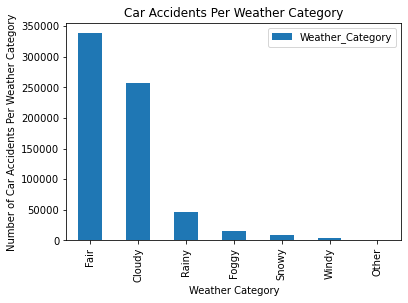

<Figure size 432x288 with 0 Axes>

In [39]:
# Generate a bar plot showing the total number of Car Accidents per Weather Category.
each_weather_condition = pd.DataFrame(pd.value_counts(AccidentData_2021["Weather_Category"]))
each_weather_condition
each_weather_condition.plot(kind = "bar")
plt.title("Car Accidents Per Weather Category")
plt.ylabel("Number of Car Accidents Per Weather Category")
plt.xlabel("Weather Category")
plt.savefig("accident_weather.png")
plt.show()
plt.tight_layout()

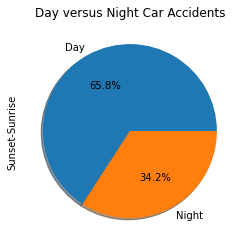

In [40]:
# Pie chart for Car Accidents verses Sunset-Sunri
sunset_sunrise_count=AccidentData_2021["Sunrise_Sunset"].value_counts()
colors = ["tab:blue", "tab:orange"]
explode = [0, 0]
sun_count = sunset_sunrise_count.index.values.tolist()
plt.pie(sunset_sunrise_count, explode=explode, labels=sun_count, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Day versus Night Car Accidents")
plt.ylabel('Sunset-Sunrise',fontsize = 10)
plt.savefig("Sunset-SunrisePy.png")
plt.show()

In [41]:
AccidentData_2021['Temperature(F)'].unique()

array([ 54.,  76.,  49.,  87.,  95.,  80.,  84.,  79.,  83.,  46.,  45.,
        74.,  69.,  77.,  63.,  72.,  61.,  89.,  29.,  73.,  82.,  47.,
        81.,  70.,  67.,  50.,  55.,  90.,  53.,  62.,  71.,  36.,  41.,
        68.,  66.,  88.,  59.,  52.,  25.,  -9.,  13.,  43.,  78.,  94.,
        75.,  33.,  39.,  64.,  86., 105.,  65.,  38.,  60.,  91.,  32.,
        58.,  85.,  96.,  35.,  37.,  30.,  57.,  97., 100.,  26.,  27.,
        28.,  48.,  42.,  93.,  23.,  44.,  51.,  92.,  56., 106.,  40.,
        34.,  99.,   9.,  31.,  21.,  14., 108.,  98.,  18.,  -1.,  20.,
       107., 102.,  15., 103., 104.,  17., 111.,  12.,  10.,  -5.,  22.,
       101.,  24.,  -8.,   1.,   3., -18.,   5.,  16., 110.,   6., 109.,
         7.,  11.,  -4.,   2.,  19.,   8.,  -6.,  -2., -13., 156.,   4.,
       112.,   0., -15., 113., -14.,  -7.,  -3., 115., -11., -10., -20.,
       196., 114., 117., -17., 136., -16., 116., -21., -19., -22., -12.,
       -26., -24., -27., -23., -25.])

In [42]:
# Create bins for temperature brackets
bins=[-30, 0, 30, 60, 90, 120]
group_names = ["Under 0", "0 to 30", "30 to 60", "60 to 90", "Over 100"]
AccidentData_2021["Temperature(F)"]=pd.cut(AccidentData_2021["Temperature(F)"], bins=bins, labels=group_names)
AccidentData_2021



C:\Users\madin\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,year,Weather_Category
224946,A-224947,2,2021-07-30 23:37:00,2021-07-31 03:22:58,40.908676,-123.707116,40.904856,-123.740056,1.740,35679.0,...,30 to 60,54.0,100.0,2.0,6.0,0.00,Fog,Night,2021,Foggy
224951,A-224952,2,2021-12-30 12:19:00,2021-12-30 15:06:09,28.472602,-81.394669,28.472574,-81.397147,0.151,1106.0,...,60 to 90,76.0,71.0,10.0,10.0,0.00,Partly Cloudy,Day,2021,Cloudy
224953,A-224954,2,2021-04-01 14:27:06,2021-04-01 16:07:07,38.946272,-94.364340,38.948519,-94.361944,0.202,641.0,...,30 to 60,47.0,33.0,10.0,6.0,0.00,Fair,Day,2021,Fair
224956,A-224957,2,2021-09-12 11:02:13,2021-09-12 12:17:13,29.672940,-95.263134,29.675054,-95.260322,0.223,8535.0,...,60 to 90,87.0,55.0,10.0,10.0,0.00,Mostly Cloudy,Day,2021,Cloudy
224957,A-224958,2,2021-08-21 16:10:05,2021-08-21 18:49:06,29.671760,-95.262012,29.673874,-95.259174,0.224,8001.0,...,Over 100,95.0,46.0,10.0,14.0,0.00,Partly Cloudy,Day,2021,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064783,A-2064784,2,2021-01-01 03:08:00,2021-01-01 06:48:34,25.947194,-80.245504,25.948197,-80.245554,0.069,18997.0,...,60 to 90,74.0,82.0,10.0,15.0,0.00,Mostly Cloudy,Night,2021,Cloudy
2064972,A-2064973,2,2021-01-01 02:21:46,2021-01-01 04:01:29,35.784219,-78.622147,35.784484,-78.622138,0.018,321.0,...,30 to 60,44.0,93.0,10.0,9.0,0.01,Light Drizzle,Night,2021,Rainy
2067189,A-2067190,2,2021-01-01 04:33:00,2021-01-01 06:08:33,27.529989,-82.507549,27.529619,-82.508809,0.081,5674.0,...,60 to 90,70.0,90.0,10.0,13.0,0.00,Fair,Night,2021,Fair
2067590,A-2067591,2,2021-01-01 02:06:00,2021-01-01 05:16:20,34.271743,-118.924741,34.275462,-118.927360,0.297,4651.0,...,30 to 60,43.0,63.0,10.0,6.0,0.00,Fair,Night,2021,Fair


In [43]:
# Create variable for each temperature group

t30_to_zero = AccidentData_2021['Temperature(F)'].value_counts()["Under 0"]
tzero_t30 = AccidentData_2021['Temperature(F)'].value_counts()["0 to 30"]
t30_t60 = AccidentData_2021['Temperature(F)'].value_counts()["30 to 60"]
t60_t90 = AccidentData_2021['Temperature(F)'].value_counts()["60 to 90"]
Over_100 = AccidentData_2021['Temperature(F)'].value_counts()["Over 100"]

#combine brackets into a list
TempCounts = [t30_to_zero, tzero_t30, t30_t60, t60_t90, Over_100]
TempCounts

[1153, 24150, 209581, 408109, 26868]

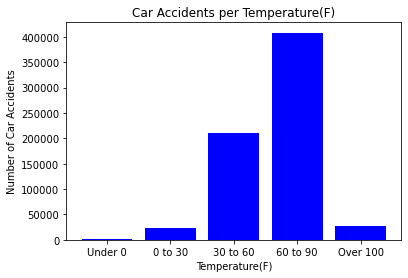

In [44]:
#bar graph to show the number of accidents in each age bracket
x_axis=np.arange(len(TempCounts))
plt.title("Car Accidents per Temperature(F)")
plt.xlabel("Temperature(F)")
plt.ylabel("Number of Car Accidents")
tick_locations = [value for value in TempCounts]
plt.xticks([0, 1, 2, 3, 4], ["Under 0", "0 to 30", "30 to 60", "60 to 90", "Over 100"])
plt.bar(x_axis, TempCounts,color="blue")
plt.savefig("accidents_per_temp.png")